# Лабораторная работа №3

In [ ]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

**Задание 1. Indian liver pations records.**

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [ ]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2. Оценить объемы выборок пациентов обоих групп.

In [ ]:
len(data[data['Dataset']==2])

167

In [ ]:
len(data[data['Dataset']==1])

416

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [ ]:
from scipy.stats.stats import pearsonr
pearsonr(data['Direct_Bilirubin'],data['Total_Bilirubin'])

(0.8746179301164134, 7.873553178023721e-185)

In [ ]:
data['Direct_Bilirubin'].fillna(0, inplace = True)
data['Total_Bilirubin'].fillna(0, inplace = True)
direct_bilirubin = data['Direct_Bilirubin']
total_bilirubin = data['Total_Bilirubin']

In [ ]:
pearsonr(direct_bilirubin, total_bilirubin) 

(0.8746179301164134, 7.873553178023721e-185)

In [ ]:
data[['Direct_Bilirubin', 'Total_Bilirubin']].cov()

,Direct_Bilirubin,Total_Bilirubin
Direct_Bilirubin,7.887659,15.252836
Total_Bilirubin,15.252836,38.558160


In [ ]:
import statistics
15.252836/(statistics.pstdev(direct_bilirubin)*statistics.pstdev(total_bilirubin))

0.8761207374582995

**Коэффициент корреляции Пирсона 0,88**

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
Direct_Bilirubin = np.array(direct_bilirubin).reshape(-1,1)
Total_Bilirubin = np.array(total_bilirubin).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
Direct_Bilirubin,
Total_Bilirubin,
test_size = 0.2
)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

1.6981839340531881
0.37754454873770543


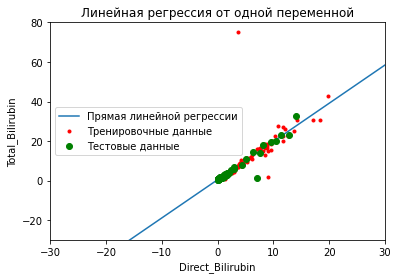

In [ ]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-30,30)
plt.ylim(-30,80)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Посчитать квантилей 10%, 25%, 50%, 75% для колонок Age, Direct_Bilirubin и Total_Bilirubin таблицы data

In [ ]:
age = data['Age']
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [ ]:
data.quantile([.10, .25, .50, .75], axis = 0)  

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квантиль 0.5 в данных выборках. Чем они отличаются?

In [ ]:
direct_bilirubin_do50=direct_bilirubin[data['Age']<50]
direct_bilirubin_do50

5      0.7
6      0.2
7      0.3
8      0.3
15     0.1
      ... 
576    8.2
577    8.4
579    0.1
581    0.5
582    0.3
Name: Direct_Bilirubin, Length: 353, dtype: float64

In [ ]:
direct_bilirubin_posle50=direct_bilirubin[data['Age']>=50]
direct_bilirubin_posle50

0      0.1
1      5.5
2      4.1
3      0.4
4      2.0
      ... 
566    0.3
567    1.4
571    0.3
578    0.1
580    0.2
Name: Direct_Bilirubin, Length: 230, dtype: float64

Text(0.5, 0, 'Direct_Bilirubin')

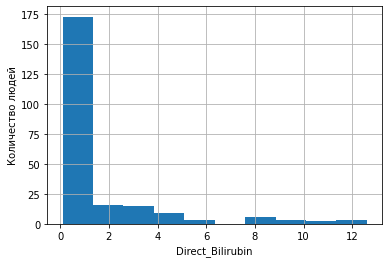

In [ ]:
df=direct_bilirubin_posle50.hist()
df.set_ylabel('Количество людей')
df.set_xlabel('Direct_Bilirubin')

Text(0.5, 0, 'Direct_Bilirubin')

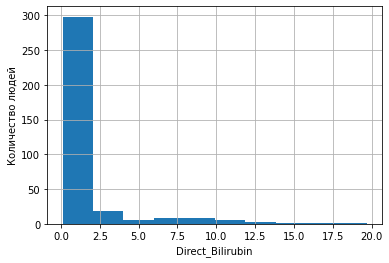

In [ ]:
df1=direct_bilirubin_do50.hist()
df1.set_ylabel('Количество людей')
df1.set_xlabel('Direct_Bilirubin')

In [ ]:
print("квантиль:",direct_bilirubin_do50.quantile([.50]))
print("ср.знач:",direct_bilirubin_do50.mean())

квантиль: 0.5    0.3
Name: Direct_Bilirubin, dtype: float64
ср.знач: 1.4946175637393755


In [ ]:
print("квантиль:",direct_bilirubin_posle50.quantile([.50]))
print("ср.знач:",direct_bilirubin_posle50.mean())

квантиль: 0.5    0.4
Name: Direct_Bilirubin, dtype: float64
ср.знач: 1.4730434782608677


Посчитать одновыборочный t-критерий для выборки по показанию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных  - 1). Если t-value, посчитанное с помощью теста, больше порогового табличного, то мы отклоняем нулевую гипотезу о сходстве.

In [ ]:
from scipy.stats import *

In [ ]:
total_bilirubin_sick=total_bilirubin[data['Dataset']==1]
ttest_1samp(total_bilirubin_sick, 0)

Ttest_1sampResult(statistic=11.888020517106993, pvalue=2.995697191414789e-28)

In [ ]:
total_bilirubin_sick.count()-1

415

1.98<11 

отвергаем нулевую гипотезу о сходстве.

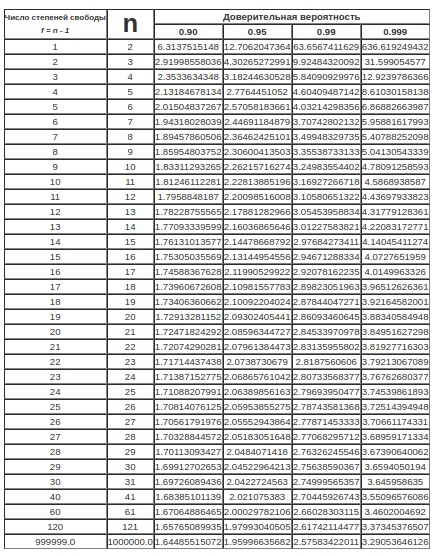

In [ ]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?

In [ ]:
total_bilirubin_health=total_bilirubin[data['Dataset']==2]
print(ttest_1samp(total_bilirubin_sick, 0))
ttest_1samp(total_bilirubin_health, 0)

Ttest_1sampResult(statistic=11.888020517106993, pvalue=2.995697191414789e-28)


Ttest_1sampResult(statistic=14.698808917873793, pvalue=7.337914669049984e-32)

Нет, не имеют.

**Задание 2. AUTO.CSV**
1. Загрузить файл auto.csv
2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis, что можно сказать о типе распределения?
5. Визуализировать несколько взаимосвязей между переменными
6. Выдвинуть несколько гипотез (2-3) по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

Загрузить файл auto.csv

In [ ]:
url="auto.csv"
df=pd.read_csv(url)
df.fillna(0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

***Мода***

In [ ]:
df.mode().head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0


***Медиана***

In [ ]:
df.median()

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
dtype: float64

***мин/макс, сред. отклонение***

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Рассчитать и визуализировать корреляционную матрицу для переменных

In [ ]:
datas=df[['symboling', 'normalized-losses',  'make',   'fuel-type',   'aspiration',   'num-of-doors',    'body-style' ,  'drive-wheels', 
    'engine-location',   'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
  'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]
datas.corr().style.set_precision(3)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000,0.498,-0.532,-0.358,-0.233,-0.541,-0.228,-0.106,-0.160,-0.020,-0.179,0.070,0.273,-0.036,0.035,-0.080
normalized-losses,0.498,1.000,-0.030,0.051,0.122,-0.333,0.152,0.166,0.014,0.039,-0.149,0.275,0.235,-0.290,-0.256,0.200
wheel-base,-0.532,-0.030,1.000,0.875,0.795,0.589,0.776,0.569,0.495,0.165,0.250,0.302,-0.363,-0.470,-0.544,0.572
length,-0.358,0.051,0.875,1.000,0.841,0.491,0.878,0.683,0.609,0.132,0.158,0.521,-0.279,-0.671,-0.705,0.679
width,-0.233,0.122,0.795,0.841,1.000,0.279,0.867,0.735,0.556,0.183,0.181,0.596,-0.214,-0.643,-0.677,0.765
height,-0.541,-0.333,0.589,0.491,0.279,1.000,0.296,0.067,0.200,-0.044,0.261,-0.115,-0.323,-0.049,-0.107,0.112
curb-weight,-0.228,0.152,0.776,0.878,0.867,0.296,1.000,0.851,0.648,0.170,0.151,0.680,-0.265,-0.757,-0.797,0.836
engine-size,-0.106,0.166,0.569,0.683,0.735,0.067,0.851,1.000,0.603,0.211,0.029,0.742,-0.241,-0.654,-0.677,0.871
bore,-0.160,0.014,0.495,0.609,0.556,0.200,0.648,0.603,1.000,-0.049,0.009,0.538,-0.277,-0.557,-0.562,0.549
stroke,-0.020,0.039,0.165,0.132,0.183,-0.044,0.170,0.211,-0.049,1.000,0.187,0.165,-0.052,-0.034,-0.037,0.080


Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis, что можно сказать о типе распределения?

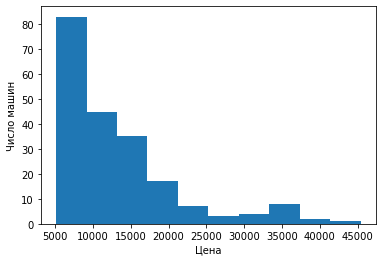

In [ ]:
plt.hist(df['price'])
plt.xlabel('Цена')
plt.ylabel('Число машин')
plt.show()

In [ ]:
df['price'].skew()

1.7663998888191028

In [ ]:
df['price'].kurtosis()

2.948637293212561

Это экспоненциальное распределение

Визуализировать несколько взаимосвязей между переменными

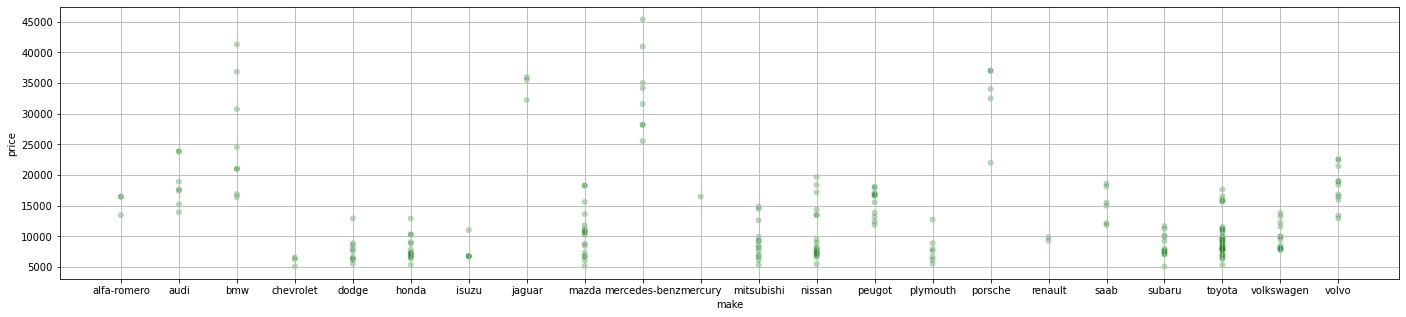

In [ ]:
price = df['price']
make = df['make']
fig, ax = plt.subplots(figsize=(24,5))
ax.scatter(make, price, c='green', alpha=0.3, edgecolors='none')
ax.grid(True)
plt.ylabel('price')
plt.xlabel('make')
plt.show()

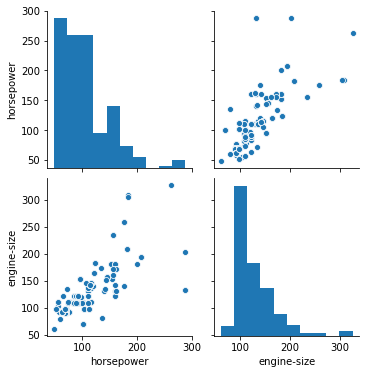

In [ ]:
sns.pairplot(df[['horsepower','engine-size']])

Выдвинуть несколько гипотез (2-3) по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

Чем больше у машины размер двигателя, тем выше цена.

In [ ]:
df['engine-size'].mean()

126.90731707317073

In [ ]:
price = df['price']
less_engine=price[df['engine-size']<=126.9]
more_engine=price[df['engine-size']>=126.9]
print(ttest_1samp(less_engine, 0))
ttest_1samp(more_engine, 0)

Ttest_1sampResult(statistic=35.10529599793565, pvalue=7.217795345789567e-68)


Ttest_1sampResult(statistic=20.238712777197836, pvalue=6.859484959801395e-32)

In [ ]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
consumption = df['highway-mpg']
gas=consumption[df['fuel-type']=='gas']
diesel=consumption[df['fuel-type']=='diesel']


In [ ]:
print(ttest_1samp(gas, 0))
ttest_1samp(diesel, 0)

Ttest_1sampResult(statistic=62.910774888700615, pvalue=2.295474782314198e-126)


Ttest_1sampResult(statistic=18.01607985967447, pvalue=2.1081730567138407e-13)

гипотеза подтвердилась и машины с большим размером двигателя стоят в среднем дороже, чем машины с меньшей.

Чем больше у машины лошадиных сил, тем выше цена.

In [ ]:
df['horsepower'].mean()

106.04878048780488

In [ ]:
price = df['price']
less_horsepower=price[df['horsepower']<=106]
more_horsepower=price[df['horsepower']>=106]
print(ttest_1samp(less_horsepower, 0))
ttest_1samp(more_horsepower, 0)

Ttest_1sampResult(statistic=30.904622072959857, pvalue=1.5274477344805865e-59)


Ttest_1sampResult(statistic=19.939307403285298, pvalue=3.424374884289838e-33)

гипотеза подтвердилась и машины с большей лошадиной силой стоят в среднем дороже, чем машины с меньшей